<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wholesale customer dataset
In this excersice, we want to run various clustering techniques on the wholesale customer dataset including: DBSCAN, Hierarchial Clustering, and K-Means. to do this we go through the following steps:

1. Loading and analyzing the data
2. Preprocessing the data
3. Exploaratory Data Analysis(EDA)
4. Choosing and setting the hyperparameters for DBSCAN
5. Applying the DBSCAN, Hierarchial Clustering, and K-means algorithms on the data
6. ٍEvaluating and analyzing the results
7. Visualizing the results.

let's begin by importing the libraries we will be using throughout this excersise.

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

### 1. Loading and analyzing the data
in this step we load the dataset using the pandas library and analyze some of it's useful properties, such as number of features and samples, name of the features, and number of missing values. we will also see some rows in order to get an idea of how the data looks like.

In [ ]:
df = pd.read_csv("Wholesale customers data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Based on the outputs we got, it seems like that we have 8 columns, and 440 samples. also we don't seem to have any missing values since every column has the exact same number of non-null entries. the "Channel", and "region" columns are also nominal data types. we will have to handle this in the preprocessing step. other than these two, every other column has an integer datatype. the dataset seems to be pretty small and does not use much space (27.6 KB)

### 2. Preprocessing the data
since we do not have any missing values in any of our columns and most of our entries are continuous valued, this step is very straight forward. the first thing we do here is to use one hot encoding for our nominal columns("Channel" and "Region"). after that we normalize our data since it is very important to do for these clustering algorithms.

In [ ]:
# applying one hot encoding on "Channel" and "Region" columns
df = pd.get_dummies(df, columns=['Channel', 'Region'], prefix = ['Channel', 'Region'])

# scaling the dataset
scaler = StandardScaler()
df.iloc[:, :6] = scaler.fit_transform(df.iloc[:, :6])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,False,True,False,False,True
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,False,True,False,False,True
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,False,True,False,False,True
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,True,False,False,False,True
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,False,True,False,False,True


as you can see we have successfully applied one hot encoding on the dataset and then we normalized our numerical features using the scikit learn library. in the next step we hop onto Exploratory Data Analysis

### 3. Exploratory Data Analysis(EDA)
in this step we want to get an idea about the shape of our data and how it is distributed. since the purpose of this excersice is clustering, we will simply do some dimensionality reduction techniques in order to find the potential clusters and maybe get and idea of how many clusters we should look for. in this excersice, we will be using the t-SNE dimensionality reduction technique and then visualize the results.

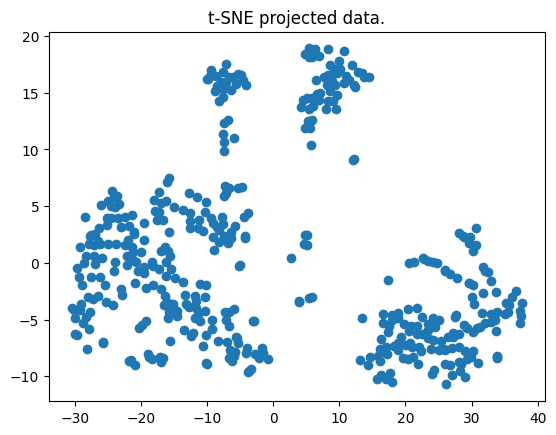

In [ ]:
t_sne = TSNE(n_components=2)
t_sne_results = t_sne.fit_transform(df)

plt.scatter(t_sne_results[:, 0], t_sne_results[:, 1])
plt.title("t-SNE projected data.")
plt.show()

based on the shape of the data, it seems that we have 4, or maybe just 2 clusters depending how you look at it. we seem to have 2 major clusters, one is the right half of this figure, and the other is the left half. but each of these two could also be divided into lower and upper clusters based on this figure. for the rest of this excercise, our aim will be to find 4 major clusters in the data.

### 4. Choosing and setting the hyperparameters for DBSCAN
Among the various clustering techniques we will be using, this particular techniques is rather unique in it's hyperparameter selection. since we do not get to sxplicitly choose the number of clusters and it is implicitly found by the algorithm itself. however, since we are aiming to find 4 major clusters in this data, we will be tweaking these hyperparameters in order to rule out outliers and get to the 4 clusters we wish to find.

based on the few hanging outliers in the middle it seems like a reasonable idea to set the min_samples to be 8. as for epsilon, we will use 1 for now.

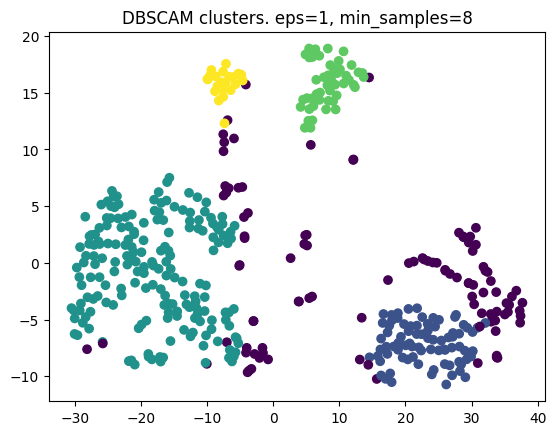

In [ ]:
# applying the DBSCAN algorithm on our dataset.
dbscan = DBSCAN(eps=1, min_samples=8)
dbscan_labels = dbscan.fit_predict(df)

# visualizing the DBSCAN algorithm's result.
plt.scatter(t_sne_results[:, 0], t_sne_results[:, 1], c=dbscan_labels)
plt.title("DBSCAM clusters. eps=1, min_samples=8")
plt.show()

it seems like our algorithm has found the majority of our clusters. however, some parts of our clusters our classified as outliers. we can mitigate this effect by increasing epsilon.

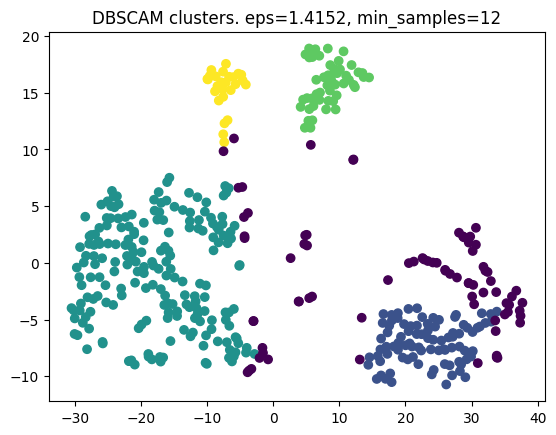

In [ ]:
# applying the DBSCAN algorithm on our dataset.
dbscan = DBSCAN(eps=1.4152, min_samples=12)
dbscan_labels = dbscan.fit_predict(df)

# visualizing the DBSCAN algorithm's result.
plt.scatter(t_sne_results[:, 0], t_sne_results[:, 1], c=dbscan_labels)
plt.title("DBSCAM clusters. eps=1.4152, min_samples=12")
plt.show()

as you can see, by increasing the epsilon and min_sample value we have effectively found our 4 main clusters. although there are some parts of the lower right cluster that are not properly identified. this could be due to the information we lost during the visualization we did at the EDA step, and there were possibly more clusters than what we saw. however for the purposes of keeping this excersice simple, we decide to go with these current hyperparameters

### 5. Applying the DBSCAN, Hierarchial Clustering, and K-means algorithms on the data
At this step, we apply various clustering techniques on our data, visualize the results, and compare these algorithms on this particular dataset together. we won't do the DBSCAN again since we've already done it in the previous step.

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Hierarchical')

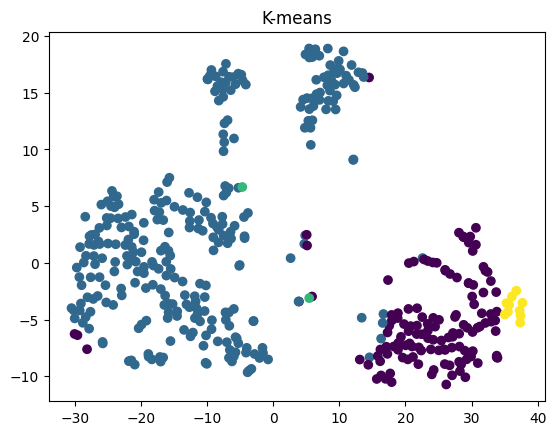

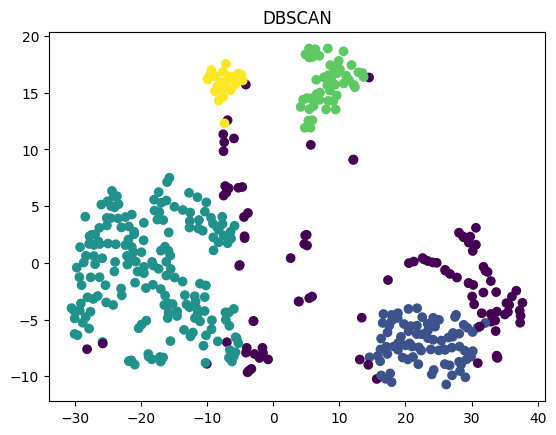

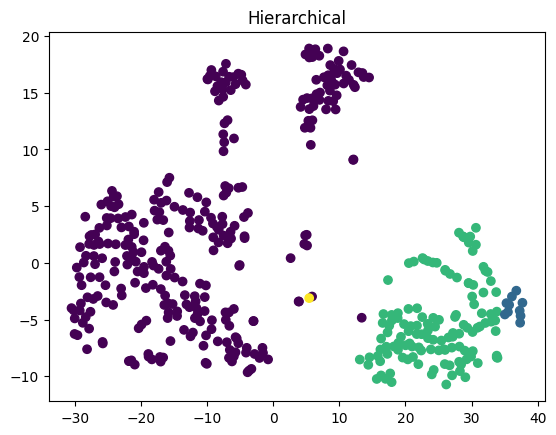

In [ ]:
# applying KMeans
kmeans = KMeans(n_clusters = 4, random_state=72)
kmeans_labels = kmeans.fit_predict(df)

# applying Hierarchial Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchial.fit_predict(df)

plt.figure()
plt.scatter(t_sne_results[:, 0], t_sne_results[:, 1], c=kmeans_labels)
plt.title('K-means')

# DBSCAN plot
plt.figure()
plt.scatter(t_sne_results[:, 0], t_sne_results[:, 1], c=dbscan_labels)
plt.title('DBSCAN')

# Hierarchical plot
plt.figure()
plt.scatter(t_sne_results[:, 0], t_sne_results[:, 1], c=hierarchical_labels)
plt.title('Hierarchical')

Based on the figures above, the only algorithm that managed to capture the 4 clusters we saw using the t-SNE method is the DBSCAN algorithm which shows how effective it is. on the other hand, the hierarchial and KMeans algorithms failed to successfully capture the patterns we saw using t-SNE. although, both of these algorithms fully captured the lower right cluster while DBSCAN could not. however, this doesn't necessarily mean that some of these algorithms are better. since we decreased the number of dimensions of our data to just 2 dimensions. it is possible that we have lost a lot of information about our data and misidentified our 4 clusters.